# Coffee Shop Dataset

This is a dataset I found in Kaggle where I plan to do some data science with it.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("coffeeshopsales.csv")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


## Exploratory Data Analysis and Visualizations

In [3]:
df_grouped_product_category = df.groupby("product_category").agg("count").reset_index()
#All of the columns here are the same because we used groupyby aggragateing by count so it is just the amount of rows where the product_category is that and then counted them.
df_grouped_product_category["amount_purchased"] = df_grouped_product_category.transaction_id
df_grouped_product_category = df_grouped_product_category[["product_category", "amount_purchased"]]
df_grouped_product_category.nlargest(9, "amount_purchased")

,product_category,amount_purchased
2,Coffee,58416
8,Tea,45449
0,Bakery,22796
4,Drinking Chocolate,11468
5,Flavours,6790
3,Coffee beans,1753
6,Loose Tea,1210
1,Branded,747
7,Packaged Chocolate,487


It is interesting to see that coffee is the most purchased drink in the NYC area among all of these coffee shops. Tea and Bakery follow with the next highest amount purchased. I assume that because these are coffee shops, Coffee has to lead because people need caffine to work and stay awake, explaining why it is the most purchased. Tea and Bakery also make sense because tea also is good energy in the morning and bakery follows a little behind so that there is something to eat in the morning but not everyone needs to buy something to eat in the morning.

<Axes: title={'center': 'Amount of Transactions Per Product Category'}, xlabel='Product Category', ylabel='Number of Transactions'>

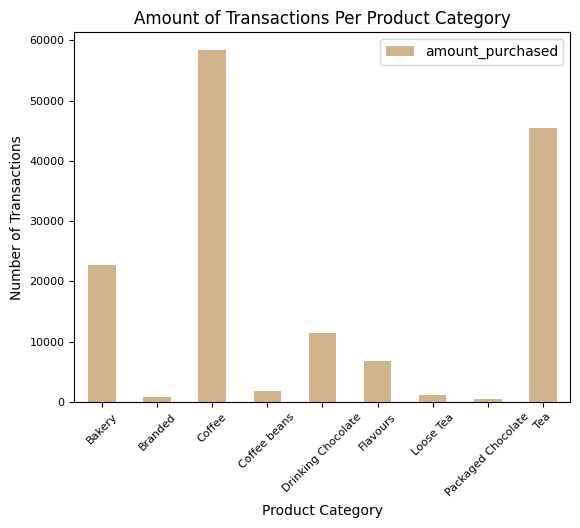

In [4]:
df_grouped_product_category.plot.bar(x = 'product_category', y = 'amount_purchased', color = "tan", linewidth=3, title = "Amount of Transactions Per Product Category", xlabel = "Product Category", ylabel = "Number of Transactions", fontsize = 8, rot=45)

##### Because Coffee is so wide-spread, especially in NYC, I want to know what the most popular way they serve coffee is.

In [5]:
df_coffee = df[df.product_category == "Coffee"]
df_coffee = df_coffee.groupby("product_type").agg("count").reset_index()
df_coffee["amount_purchased"] = df_coffee.transaction_id
df_coffee = df_coffee[["product_type", "amount_purchased"]]
df_coffee.nlargest(5, "amount_purchased")

,product_type,amount_purchased
2,Gourmet brewed coffee,16912
0,Barista Espresso,16403
3,Organic brewed coffee,8489
1,Drip coffee,8477
4,Premium brewed coffee,8135


This is cool to see what the best way to serve coffee in these three NYC locations is Gourmet brewed coffee. One thing about me is that I have no idea about coffee. I wonder how expensive this would end up being? Gourmet sounds expensive, I wonder how much revenue without costs they make from this.

In [6]:
df_coffee = df[df.product_category == "Coffee"]
df_coffee["price_new"] = df_coffee.transaction_qty * df_coffee.unit_price
df_coffee = df_coffee.groupby("product_type").agg("sum").reset_index()
df_coffee = df_coffee[["product_type", "price_new"]]
df_coffee.nlargest(5, "price_new")

/tmp/ipykernel_11630/3698997375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee["price_new"] = df_coffee.transaction_qty * df_coffee.unit_price


,product_type,price_new
0,Barista Espresso,91406.20
2,Gourmet brewed coffee,70034.60
4,Premium brewed coffee,38781.15
3,Organic brewed coffee,37746.50
1,Drip coffee,31984.00


This is pretty neat to look at. Even though these locations sold more transactions of Gourmet Brewed Coffee, a lot more money is coming from Barista Espressos. Now that we know we have to account for the quantity because the rows are just transactions, I want to try again and see how many coffees were sold.

<Axes: title={'center': 'Total Price of Different Types of Coffee'}, xlabel='Coffee Type', ylabel='Total Price'>

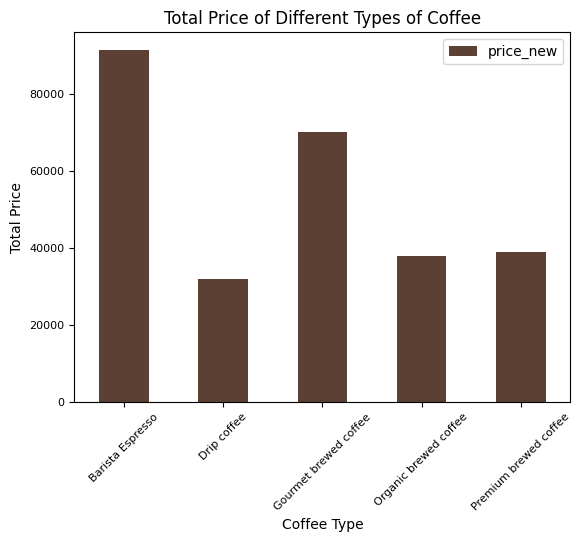

In [7]:
df_coffee.plot.bar(x = 'product_type', y = 'price_new', color = "#5C4033", linewidth=3, title = "Total Price of Different Types of Coffee", xlabel = "Coffee Type", ylabel = "Total Price", fontsize = 8, rot=45)

In [8]:
df_coffee = df[df.product_category == "Coffee"]
df_coffee = df_coffee.groupby("product_type").agg("sum").reset_index()
df_coffee = df_coffee[["product_type", "transaction_qty"]]
df_coffee.nlargest(5, "transaction_qty")

,product_type,transaction_qty
2,Gourmet brewed coffee,25973
0,Barista Espresso,24943
3,Organic brewed coffee,13012
1,Drip coffee,12891
4,Premium brewed coffee,12431


We still see the same results which is interesting. We have a higher quantity now. I think the first process was wrong but it gave us the right answer about which is the most popular way coffee is served. But the difference between Gourmet Brewed Coffee and Barista Espresso is so minimal.

<Axes: title={'center': 'Different Types of Coffee by Amount'}, xlabel='Type of Coffee', ylabel='Amount'>

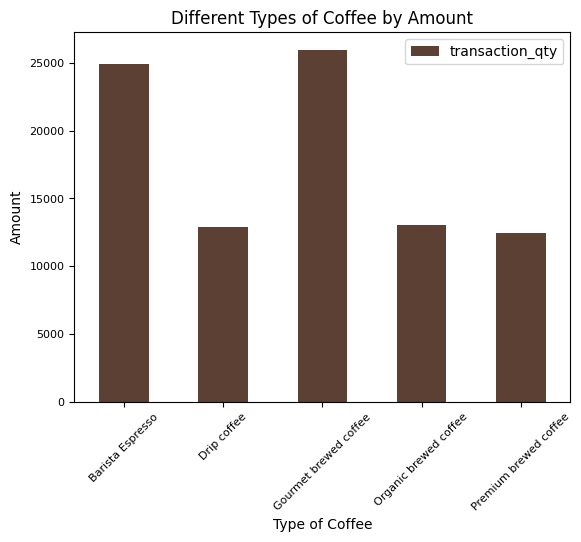

In [9]:
df_coffee.plot.bar(x = 'product_type', y = 'transaction_qty', color = "#5C4033", linewidth=3, title = "Different Types of Coffee by Amount", xlabel = "Type of Coffee", ylabel = "Amount", fontsize = 8, rot=45)

I want to see if there is any trend for the coffee product at all during this period from Jan 1, 2023 to June 30, 2023. Coffee is popular all throughout, but I want to see if there is any wavering at all that happens.

<Axes: title={'center': 'Trend Line of Transactions of Coffee'}, xlabel='Date', ylabel='Number of Transactions'>

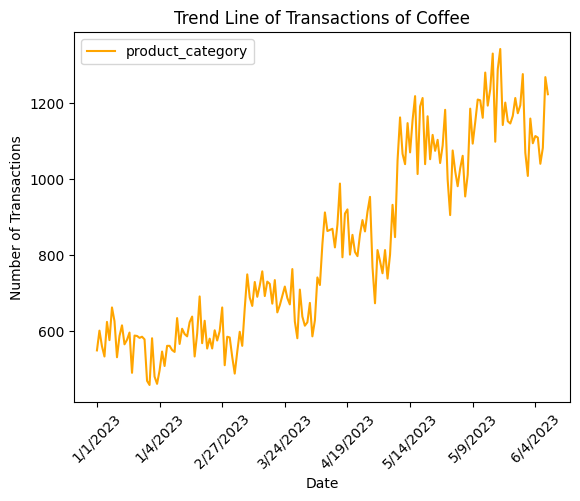

In [10]:
df_line = df[df.product_category == "Coffee"]
df_line = df.groupby("transaction_date").agg("count").reset_index()
df_line.plot.line(x = 'transaction_date', y = "product_category", xlabel= "Date", ylabel = "Number of Transactions", title = "Trend Line of Transactions of Coffee", rot = 45, color = "orange")

This graph is a good visualization of what I was wondering. In the colder months like January and February, the amount of transactions are low, but as we get into the warmer months, we see a good increase. I think it may be due to how people don't really leave their houses in the winter months and do more so often in the summer months.

I also want to see if there is any difference in hot chocolate purchases within this period. I know what the answer will be but I want to see the trend line.

<Axes: title={'center': 'Trend Line of Transactions of Hot Chocolate'}, xlabel='Date', ylabel='Number of Transactions'>

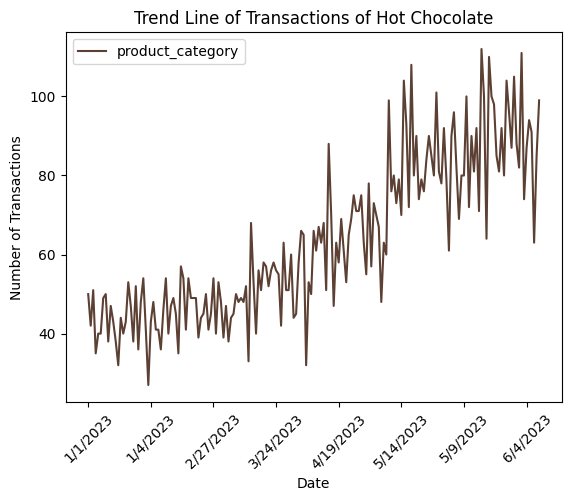

In [11]:
df_cocoa = df[df.product_category == "Drinking Chocolate"]
df_cocoa = df_cocoa.groupby("transaction_date").agg("count").reset_index()
df_cocoa.plot.line(x = "transaction_date", y = "product_category", xlabel= "Date", ylabel = "Number of Transactions", title = "Trend Line of Transactions of Hot Chocolate", rot = 45, color = "#5C4033")

This is not what I expected. The range doesn't seem to be a lot, but we would have to do some hypothesis testing for this to really see if there is a difference or not between January and June.

Lets look at the range of transactions.

In [12]:
print("Range:" , df_cocoa.transaction_id.max() - df_cocoa.transaction_id.min())

Range: 85


The Range is only 85 transactions. I will have to conduct a hypothesis test to see if the means are different.

### Hypothesis Testing

I will do a two sample t-test to figure out if there is a difference or not between the mean transactions between January and June. The significance level that I will set is $\alpha$ = .05

**Null Hypothesis**: H<sub>0</sub>: $\mu$<sub>Jan</sub> = $\mu$<sub>Jun</sub>

**Alternative Hypothesis**: H<sub>a</sub>: $\mu$<sub>Jan</sub> $\neq$ $\mu$<sub>Jun</sub>

In [13]:
#Intial grouping of the January Data
import datetime
jan1 = datetime.datetime(2023, 1, 1)
jan31 = datetime.datetime(2023, 1, 31)
df["date"] = pd.to_datetime(df["transaction_date"])
df_jan = df[(df.date >= jan1) & (df.date <= jan31) & (df.product_type == "Hot chocolate")]
df_jan = df_jan.groupby("transaction_date").agg("count").reset_index()
#These next few lines aren't that relevant
jan_mean = df_jan.transaction_id.mean()
jan_std = df_jan.transaction_id.std()
jan_size = len(df_jan)

In [14]:
#Initial grouping of the June Data
jun1 = datetime.datetime(2023, 6, 1)
jun30 = datetime.datetime(2023, 6, 30)
df_jun = df[(df.date >= jun1) & (df.date <= jun30) & (df.product_type == "Hot chocolate")]
df_jun = df_jun.groupby("transaction_date").agg("count").reset_index()
#These next few lines aren't that relevant
jun_mean = df_jun.transaction_id.mean()
jun_std = df_jun.transaction_id.std()
jun_size = len(df_jun)

In [15]:
from scipy.stats import ttest_ind
ttest_ind(df_jan.transaction_id, df_jun.transaction_id, alternative = "two-sided")

TtestResult(statistic=np.float64(-17.767580149506372), pvalue=np.float64(2.330623475245827e-25), df=np.float64(59.0))

We have sufficient evidence to conclude that the average amount of transactions in January is different from the average amount of transactions in June. This is what I assumed but I had to make sure.

### What I have understood

This was a really cool dataset where I could do so much interesting data analysis on this so I could learn more about coffee in NYC within these three locations. Hot Chocolate as a piece for analysis was pretty cool to see to see how the trends are and to see if there is a difference between January Hot Chocolate sales and June Hot Chocolate sales. I want to work on this dataset more using KMeans and LinearRegression Machine Learning models. The author of the dataset themselves has some reccommended analysis on the Kaggle website, so would love to work on this set more.

##### Continuation on with this workbook

In [16]:
# I added the column for the Day of the Week for each day
df["day_of_week"] = pd.to_datetime(df['date']).dt.strftime('%A')
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,date,day_of_week
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023-01-01,Sunday
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01,Sunday
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,2023-01-01,Sunday
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2023-01-01,Sunday
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023-01-01,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023-06-30,Friday
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023-06-30,Friday
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023-06-30,Friday
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30,Friday


In [17]:
df_dow = df.groupby("day_of_week").agg("count").reset_index()
df_dow_ordered = df_dow.nlargest(7, "transaction_id")
df_dow_ordered

,day_of_week,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,date
0,Friday,21701,21701,21701,21701,21701,21701,21701,21701,21701,21701,21701,21701
4,Thursday,21654,21654,21654,21654,21654,21654,21654,21654,21654,21654,21654,21654
1,Monday,21643,21643,21643,21643,21643,21643,21643,21643,21643,21643,21643,21643
6,Wednesday,21310,21310,21310,21310,21310,21310,21310,21310,21310,21310,21310,21310
5,Tuesday,21202,21202,21202,21202,21202,21202,21202,21202,21202,21202,21202,21202
3,Sunday,21096,21096,21096,21096,21096,21096,21096,21096,21096,21096,21096,21096
2,Saturday,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510,20510


<Axes: xlabel='Day of the Week', ylabel='Amount of Transactions'>

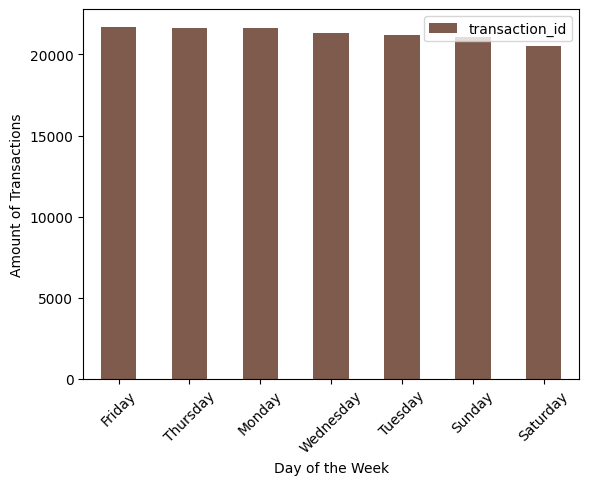

In [18]:
df_dow_ordered.plot.bar(x="day_of_week", y="transaction_id", color = "#7e5b4d", rot = 45, xlabel = "Day of the Week", ylabel = "Amount of Transactions")

This was a recommended analysis on the Kaggle website. However, there isn't that much of a difference between these days. The graphs show that the amount of transactions over this period are pretty much similar per day. I would like to do an ANOVA test for this, but honestly, I don't know how to.